<a href="https://colab.research.google.com/github/software-dev2010/BlackBoxMachineLearning/blob/main/ProiectBlackBox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [231]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Import TensorFlow
import tensorflow as tf
print("TF version: ", tf.__version__)

# import TensorFlow Hub 
import tensorflow_hub as hub
print("HUB version: ", hub.__version__)

#!unzip "drive/MyDrive/Facultate/ia-id-22" -d "drive/My Drive/Facultate"

TF version:  2.8.0
HUB version:  0.12.0


In [232]:
train_samples = np.load("drive/MyDrive/Facultate/train_samples.npy")
np.set_printoptions(suppress=True)

In [233]:
train_samples = train_samples.T
x_train = np.reshape(train_samples, (1000, 28, 28))

In [234]:
#x_train = x_train * 255

In [235]:
x_train

array([[[0.12039034, 0.        , 0.        , ..., 0.        ,
         0.25186906, 0.        ],
        [0.00002647, 0.        , 0.00023887, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.6889491 , 0.        ],
        ...,
        [0.00018945, 0.92377214, 0.        , ..., 0.        ,
         0.        , 0.18755319],
        [0.        , 0.00000971, 0.00064975, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.13388185, ..., 0.39041834,
         0.19844221, 0.07407835]],

       [[0.32371807, 0.        , 0.17420925, ..., 0.        ,
         0.72341737, 0.64603305],
        [0.00033012, 0.        , 0.65124033, ..., 0.        ,
         0.44704811, 0.        ],
        [0.        , 0.        , 0.00000003, ..., 0.        ,
         0.00000014, 0.        ],
        ...,
        [0.        , 0.00170334, 0.        , ..., 0.        ,
         0.        , 0.69331541],
        [0.0

In [236]:
type(x_train)

numpy.ndarray

In [237]:
#x_train = x_train.astype('uint8')

In [238]:
x_train.dtype

dtype('float64')

In [239]:
x_train.size

784000

In [240]:
x_train.shape

(1000, 28, 28)

In [241]:
x_train[0]

array([[0.12039034, 0.        , 0.        , 0.67684946, 0.762416  ,
        0.86248539, 0.        , 0.        , 0.        , 0.00000214,
        0.        , 0.        , 0.        , 0.00030336, 0.00005833,
        0.        , 0.        , 0.        , 0.00001704, 0.        ,
        0.02893439, 0.43329571, 0.        , 0.97344309, 0.00065164,
        0.        , 0.25186906, 0.        ],
       [0.00002647, 0.        , 0.00023887, 0.05107286, 0.1197222 ,
        0.26131522, 0.        , 0.05044949, 0.02961606, 0.00005426,
        0.        , 0.00178306, 0.        , 0.        , 0.        ,
        0.        , 0.18713329, 0.        , 0.13431652, 0.00001007,
        0.00016623, 0.        , 0.00007904, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00000011,
        0.0052616 , 0.20294112, 0.        , 0.14663555, 0.12491417,
        0.        , 0.        , 0.        , 0.46085609, 0.        ,
        0.00023056, 0.9525

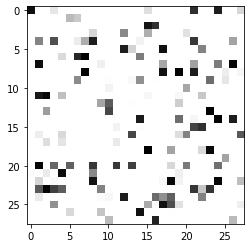

In [242]:
import matplotlib.pyplot as plt
#plt.figure(dpi=1200)
plt.imshow(x_train[6],cmap=plt.cm.binary)
plt.show()

In [243]:
x_train.size

784000

In [244]:

x_train.dtype

dtype('float64')

In [245]:
test_samples = np.load("drive/MyDrive/Facultate/test_samples.npy")
np.set_printoptions(suppress=True)

In [246]:
test_samples

array([[0.00002352, 0.81171077, 0.99141869, ..., 0.96318398, 0.91632066,
        0.03107871],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.50581123, 0.        , 0.00006633, ..., 0.0000471 , 0.53911149,
        0.        ],
       ...,
       [0.22671873, 0.        , 0.        , ..., 0.        , 0.4831048 ,
        0.        ],
       [0.09692939, 0.1140587 , 0.66867977, ..., 0.29670893, 0.24744506,
        0.44129307],
       [0.84257603, 0.00005355, 0.05365002, ..., 0.00630429, 0.        ,
        0.49411784]])

In [247]:
train_labels = np.load("drive/MyDrive/Facultate/train_labels.npy")
np.set_printoptions(suppress=True)

In [248]:
train_labels

array([ 8,  4,  5,  7,  2,  9,  2,  1, 10,  9,  1,  4,  2,  3,  8,  1,  3,
       10,  7,  1,  2,  7,  8,  2, 10,  8,  7,  6,  6,  9,  9,  4,  5,  5,
        9,  8,  4,  7,  5,  7,  7,  4,  9,  9, 10, 10,  5,  5,  1,  8,  9,
        2,  1,  1,  2,  9,  6,  8,  2,  8,  6,  6, 10, 10,  5,  3,  6,  4,
        8,  5,  7,  7,  1,  2,  1,  2,  3,  5,  9,  6,  4,  6,  1,  1,  7,
        5,  4,  9,  4,  8,  2,  5,  4, 10,  3,  3,  1,  4,  7,  7,  8,  5,
        4,  3,  3,  5, 10,  2,  1,  6,  3,  5,  9,  3,  2,  1,  9,  5,  5,
        9,  1,  7,  5,  2,  5, 10,  7,  4,  2,  3, 10,  1,  2,  1,  5,  3,
       10, 10,  5,  4,  9,  7, 10,  4,  1,  7,  8,  1,  4,  2,  5,  3,  4,
        4,  1,  5,  3,  6,  6,  7,  4,  8,  3,  9,  6, 10,  3,  1,  2,  2,
        9,  3, 10,  4,  2,  5,  2,  6,  8,  7,  5,  8,  8,  9,  4, 10,  4,
        1,  6,  2,  4,  3,  1,  4,  1,  5,  1,  8,  5,  9,  9, 10,  1,  1,
        2,  9,  8,  4, 10, 10,  6,  6, 10,  7,  8,  9,  3,  5,  7, 10,  9,
        2,  7,  8, 10,  2

In [249]:
train_labels.shape


(1000,)

In [250]:
y_train = train_labels

In [251]:
y_train[0]

8

In [252]:
test_samples.shape

(784, 5000)

In [253]:
test_samples = test_samples.T
x_test = np.reshape(test_samples, (5000, 28, 28))

In [254]:
x_test

array([[[0.00002352, 0.        , 0.50581123, ..., 0.        ,
         0.        , 0.06640521],
        [0.00000002, 0.        , 0.79021775, ..., 0.        ,
         0.00000003, 0.58130774],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.02320033, 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.98351532],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.88396268, 0.        ],
        [0.        , 0.        , 0.64499773, ..., 0.22671873,
         0.09692939, 0.84257603]],

       [[0.81171077, 0.        , 0.        , ..., 0.        ,
         0.        , 0.04757896],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.08582774],
        [0. 

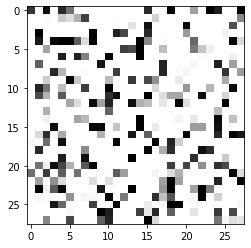

In [255]:
import matplotlib.pyplot as plt

plt.imshow(x_test[500
                ],cmap=plt.cm.binary)
plt.show()

In [256]:
x_train.shape
y_train.shape

(1000,)

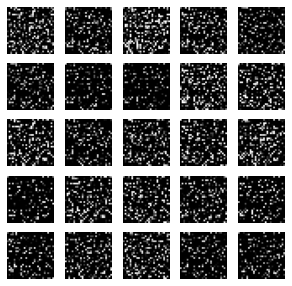

In [257]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [258]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical

In [259]:
# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

10

In [260]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))


Train labels:  {1: 113, 2: 108, 3: 93, 4: 115, 5: 88, 6: 80, 7: 107, 8: 101, 9: 89, 10: 106}


In [261]:
y_train

array([ 8,  4,  5,  7,  2,  9,  2,  1, 10,  9,  1,  4,  2,  3,  8,  1,  3,
       10,  7,  1,  2,  7,  8,  2, 10,  8,  7,  6,  6,  9,  9,  4,  5,  5,
        9,  8,  4,  7,  5,  7,  7,  4,  9,  9, 10, 10,  5,  5,  1,  8,  9,
        2,  1,  1,  2,  9,  6,  8,  2,  8,  6,  6, 10, 10,  5,  3,  6,  4,
        8,  5,  7,  7,  1,  2,  1,  2,  3,  5,  9,  6,  4,  6,  1,  1,  7,
        5,  4,  9,  4,  8,  2,  5,  4, 10,  3,  3,  1,  4,  7,  7,  8,  5,
        4,  3,  3,  5, 10,  2,  1,  6,  3,  5,  9,  3,  2,  1,  9,  5,  5,
        9,  1,  7,  5,  2,  5, 10,  7,  4,  2,  3, 10,  1,  2,  1,  5,  3,
       10, 10,  5,  4,  9,  7, 10,  4,  1,  7,  8,  1,  4,  2,  5,  3,  4,
        4,  1,  5,  3,  6,  6,  7,  4,  8,  3,  9,  6, 10,  3,  1,  2,  2,
        9,  3, 10,  4,  2,  5,  2,  6,  8,  7,  5,  8,  8,  9,  4, 10,  4,
        1,  6,  2,  4,  3,  1,  4,  1,  5,  1,  8,  5,  9,  9, 10,  1,  1,
        2,  9,  8,  4, 10, 10,  6,  6, 10,  7,  8,  9,  3,  5,  7, 10,  9,
        2,  7,  8, 10,  2

In [262]:
# convert to one-hot vector
y_train = to_categorical(y_train
                         )

In [263]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [264]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [265]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [266]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [267]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [268]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 activation_15 (Activation)  (None, 256)               0         
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               65792     
                                                                 
 activation_16 (Activation)  (None, 256)               0         
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 10)               

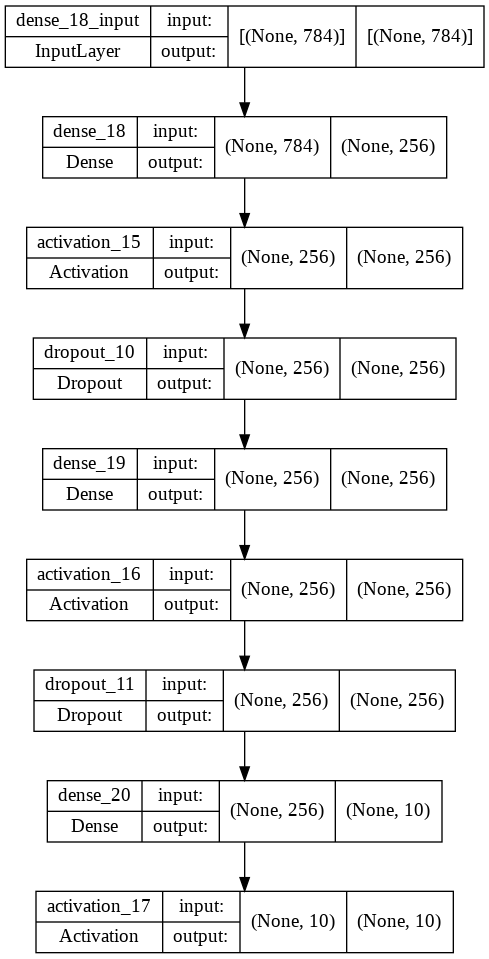

In [269]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [270]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [271]:
y_train.shape

(1000, 11)

In [273]:
a = tf.keras.utils.to_categorical([1, 2, 3])

In [274]:
a

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

https://www.kaggle.com/code/prashant111/mnist-deep-neural-network-with-keras/notebook
https://www.milindsoorya.com/blog/handwritten-digits-classification
